<a href="https://colab.research.google.com/github/meng19951027/OUC-/blob/main/SLSM_based_on_random_selection_of_non_landslide_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio
from matplotlib import cm,colors
from rasterio.plot import show
import pandas as pd
sns.set(font= "Times new roman",style="ticks",font_scale=1.2,rc={"font.size":10})
import warnings
warnings.filterwarnings("ignore")

In [ ]:
landslide_nolandslide=pd.read_excel(r'ML_dataset_random.xlsx',sheet_name=0)
display(landslide_nolandslide.head())

,Rebathymeter,Recurvatue,Refault,Repipeline,Resediment,Resesimic,Reslope,Revessel,Revolcano,class
0,3,2,8,2,2,1,5,1,8,1
1,4,2,8,2,2,1,1,1,8,1
2,2,2,8,2,2,1,4,1,8,1
3,2,2,8,2,2,1,1,1,8,1
4,2,1,8,2,2,2,7,1,8,1


#  Divide training and test set

In [ ]:
data_train=pd.read_excel(r'ML-dataset.xlsx',sheet_name=0)
data_selection=data_train.drop(['Refault','Revessel'],axis=1)
xtrain=data_selection.iloc[:,:-1]
ytrain=data_selection.iloc[:,-1]
print(xtrain)
print(ytrain)

data_test=pd.read_excel(r'ML-dataset.xlsx',sheet_name=1)
data_selection2=data_test.drop(['Refault','Revessel'],axis=1)
xtest=data_selection2.iloc[:,:-1]
ytest=data_selection2.iloc[:,-1]
print(xtest)
print(ytest)

      Rebathymeter  Recurvatue  Repipeline  Resediment  Resesimic  Reslope  \
0                3           2           2           2          1        5   
1                2           2           2           2          1        4   
2                2           2           2           2          1        1   
3                2           1           2           2          2        7   
4                4           3           2           2          2        7   
...            ...         ...         ...         ...        ...      ...   
2056             3           2           6           5          1        2   
2057             4           2           5           5          1        1   
2058             1           2           2           5          2        1   
2059             4           2           1           5          1        3   
2060             1           2           2           5          2        1   

      Revolcano  
0             8  
1             8  
2        

# Model establishment and training

## Logistic regression

In [ ]:
def LR(xtrain,ytrain):
    from sklearn.linear_model import LogisticRegression

    parameters_logistic = {'C': [0.001, 0.01, 0.1,1,10],
                           'penalty': ['l1', 'l2'],
                          }
    from sklearn.model_selection import GridSearchCV
    logistic_model_grid=LogisticRegression()
    grid_model_logistic=GridSearchCV(logistic_model_grid,parameters_logistic,cv=10,n_jobs=-1)
    grid_model_logistic.fit(xtrain,ytrain)
    print('the best parameters : {}'.format(grid_model_logistic.best_params_))
    para=grid_model_logistic.best_params_
    best_model_lr=LogisticRegression(C=para['C'],
                                     penalty=para['penalty'],
                                    )
    best_model_lr.fit(xtrain,ytrain)
    return best_model_lr
best_model_lr=LR(xtrain,ytrain)
print(best_model_lr.score(xtrain,ytrain))
print(best_model_lr.score(xtest,ytest))

the best parameters : {'C': 0.001, 'penalty': 'l2'}
0.8335759340126152
0.8380520951302378


## Random forest

In [ ]:
def RF(xtrain,ytrain):
    from sklearn.ensemble import RandomForestClassifier
    rf_simple = RandomForestClassifier()
    grid_rf =  {'n_estimators': range(10,100,10),
                   'max_depth': range(3,8)
               }
    from sklearn.model_selection import GridSearchCV
    model_rf = GridSearchCV(rf_simple, param_grid = grid_rf,cv =10,n_jobs=-1)
    model_rf.fit(xtrain, ytrain)
    print(model_rf.best_params_)
    para=model_rf.best_params_
    best_model_rf=RandomForestClassifier(n_estimators=para['n_estimators'],
                                         max_depth=para['max_depth'],
                                        )
    best_model_rf.fit(xtrain,ytrain)
    return best_model_rf
best_model_rf=RF(xtrain,ytrain)
print(best_model_rf.score(xtrain,ytrain))
print(best_model_rf.score(xtest,ytest))

{'max_depth': 6, 'n_estimators': 40}
0.8641436196021349
0.853907134767837


## Artificial nerual network

In [ ]:
def ANN(xtrain,ytrain):
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import GridSearchCV
    param_grid_ann = {"hidden_layer_sizes": [(10),(20),(30),(40),(50),(60),(70),(80),(90),(100)],
                      "solver": ["lbfgs", "sgd", "adam"],
                      "activation":["identity", "logistic", "tanh", "relu"],
                      "learning_rate_init":[0.0001,0.001,0.1]}

    mlp_simple=MLPClassifier()
    model_mlp = GridSearchCV(mlp_simple,param_grid = param_grid_ann,cv =10,verbose=True,n_jobs=-1)
    model_mlp.fit(xtrain, ytrain)
    print(model_mlp.best_params_)
    para=model_mlp.best_params_
    best_model_mlp=MLPClassifier(hidden_layer_sizes=(para['hidden_layer_sizes']),
                                 solver=para['solver'],
                                 activation=para['activation'],
                                 learning_rate_init=para['learning_rate_init'],
                                 random_state=0
                                )
    best_model_mlp.fit(xtrain,ytrain)
    return best_model_mlp
best_model_mlp=ANN(xtrain,ytrain)
print(best_model_mlp.score(xtrain,ytrain))
print(best_model_mlp.score(xtest,ytest))

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
{'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.001, 'solver': 'adam'}
0.849102377486657
0.8482446206115515


# Save machine learning models

In [ ]:
import joblib
joblib.dump(best_model_lr,r'lr_random.pkl')
joblib.dump(best_model_rf,r'rf_random.pkl')
joblib.dump(best_model_mlp,r'ann_random.pkl')

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
sns.set(font= "Times new roman",style="ticks",font_scale=1.0,rc={"font.size":10})
def confusion_matrix_plot(model,model_name,data_x,data_y):
    fig,ax=plt.subplots(1,3,figsize=(9,2))
    for i in range(3):
        matrix_norain = confusion_matrix(data_y, model[i].predict(data_x))
        group_names = ['TN', 'FP','FN', 'TP']
        group_counts = ['{0:0.0f}'.format(value) for value in matrix_norain.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in matrix_norain.flatten()/np.sum(matrix_norain)]
        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2,2)

        stats_rain = '\n\nAccuracy = {0:.2%}\nError rate = {1:.2%}'.format((matrix_norain[0,0]+matrix_norain[1,1])/np.sum(matrix_norain)
                                                                           ,(matrix_norain[0,1]+matrix_norain[1,0])/np.sum(matrix_norain))

        sns.heatmap(matrix_norain, annot=labels, fmt='', cbar=False, cmap='RdBu',ax=ax[i],
                   annot_kws={'fontname':'Times new roman'
#                               ,'fontweight':'bold'
                             })
        ax[i].set_title(model_name[i])
        ax[i].set_ylabel('True label')
#         ax[i].set_xlabel('Predicted label')
        ax[i].set_xlabel('Predicted label' + stats_rain,fontsize=10)
    plt.subplots_adjust(wspace=0.8)
#     plt.tight_layout()
    plt.show()
    return fig
model=[best_model_lr,best_model_rf,best_model_mlp]
model_name=['LR','RF','ANN']

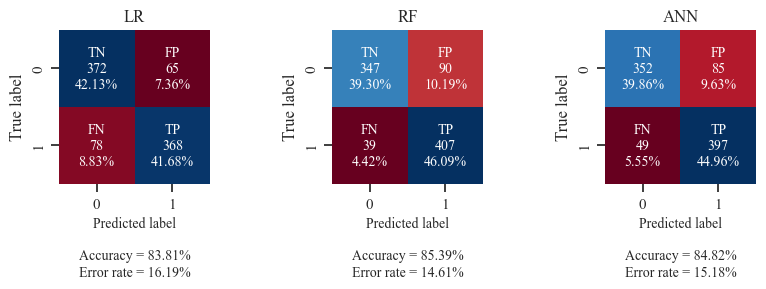

In [ ]:
fig2=confusion_matrix_plot(model,model_name,xtest,ytest)

In [ ]:
fig2.savefig(r'Test_confusion_matrix_random.png',dpi=300,bbox_inches='tight')

# ROC curve of the test set

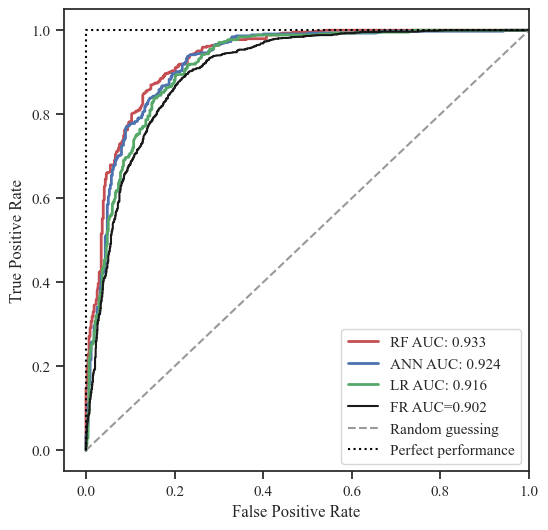

In [ ]:
def auc_calc(x_data,y_data,model):
    pred_prob_rf=model.predict_proba(x_data)[:,1]
    fpr1, tpr1, threshold1 = roc_curve(y_data, pred_prob_rf, pos_label=1)
    roc_auc1 = auc(fpr1, tpr1)
    return fpr1,tpr1,roc_auc1
fpr1,tpr1,roc_auc1=auc_calc(xtest,ytest,best_model_rf)
fpr3,tpr3,roc_auc3=auc_calc(xtest,ytest,best_model_mlp)
fpr4,tpr4,roc_auc4=auc_calc(xtest,ytest,best_model_lr)
X_data=[fpr1,fpr3,fpr4]
Y_data=[tpr1,tpr3,tpr4]

from sklearn.metrics import roc_auc_score, roc_curve, auc
color_line=['r','b','g']
auc_value=[roc_auc1,roc_auc3,roc_auc4]
label_text=['RF','ANN','LR']
f, ax = plt.subplots(figsize=(6,6))
for i in range(3):
    plt.plot(X_data[i],Y_data[i], color =color_line[i], lw=2
             ,label= label_text[i] + ' AUC: {:.3f}'.format(auc_value[i]))
fr_roc=pd.read_excel(r'D:\LSM_script\LSM_ML\ROC_curve\ROC.xlsx',sheet_name=0)
plt.plot(fr_roc.iloc[:,0],fr_roc.iloc[:,1],'-k',label='FR AUC=0.902')
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'Random guessing')
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black',
         label = 'Perfect performance')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
f.savefig(r'Test_fr_roc_random.png',dpi=300,bbox_inches='tight')